# Diabetes Classification (ANN)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('../data/diabetes.csv')
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.dtypes

Number of times pregnant          int64
Plasma glucose concentration      int64
Diastolic blood pressure          int64
Triceps skin fold thickness       int64
2-Hour serum insulin              int64
Body mass index                 float64
Diabetes pedigree function      float64
Age                               int64
Class variable                    int64
dtype: object

In [5]:
data.isnull().sum()

Number of times pregnant        0
Plasma glucose concentration    0
Diastolic blood pressure        0
Triceps skin fold thickness     0
2-Hour serum insulin            0
Body mass index                 0
Diabetes pedigree function      0
Age                             0
Class variable                  0
dtype: int64

In [6]:
X = data.drop('Class variable', axis=1)
y = data['Class variable']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

### Step: Calculate average accuracy for 10 runs
- Create an empty list and assign it to **accuracies**
- Loop over **i** over 10 integers.
    - Set the random seed: **tf.random.set_seed(i)**
    - Create a **Sequential** model
    - Add a **Dense** layer with one exit node and **input_dim=8**, and **activation='sigmoid'**
    - Compile the model with **loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']**
    - Fit the model with **epochs=1500, batch_size=100, verbose=0**
    - Calculate the accuracy with **evaluate** on **X_test** and **y_test**
        - The second return variable is the accuracy
    - Append the accuracy (possibly multiplied by 100) to **accuraries**
- Calculate the average value

In [9]:
accuracies = []

for i in range(1,11):
    tf.random.set_seed(i)
    model = Sequential()
    model.add(Dense(1,input_dim=8, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train,y_train,epochs=1500, batch_size=100, verbose=0)
    accuracy = model.evaluate(X_test,y_test)[1] * 100
    accuracies.append(accuracy)

5/5 [==============================] - 0s 8ms/step - loss: 0.5046 - accuracy: 0.7922


In [10]:
accuracies

[77.27272510528564,
 76.6233742237091,
 80.51947951316833,
 77.92207598686218,
 79.22077775001526,
 77.27272510528564,
 79.22077775001526,
 76.6233742237091,
 79.22077775001526,
 79.22077775001526]

In [11]:
sum(accuracies)/len(accuracies)

78.3116865158081

In [13]:
y_pred = model.predict(X)
y_pred = np.where(y_pred <.5, 0, 1)

24/24 [==============================] - 0s 1ms/step


### Step: Visualize correct vs incorrect predictions
- Calculate the ones that differ
    - **np.abs(y.to_numpy() - y_pred.T)** *(assuming the variables names are correct)*
    - Incorrect predictions will be 1, correct will be 0
- Make a scatter plot with the two variables and the correctness calculations as colors

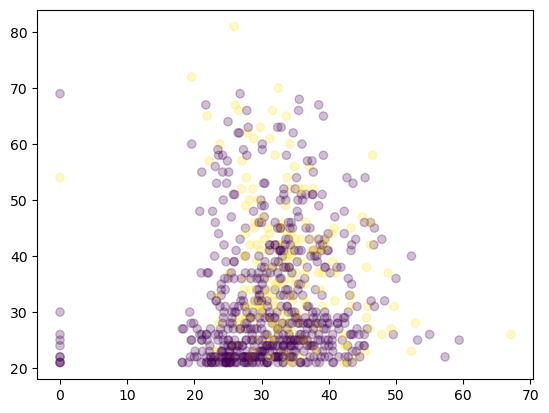

In [14]:
differ = np.abs(y.to_numpy() - y_pred.T)

fig, ax = plt.subplots()
ax.scatter(x=X['Body mass index'], y=X['Age'], c=differ, alpha=.25)